# Objective:
Given the Breast Cancer Patient's data like Age,Year of operation ,No of auxillary Nodes detected and status, we should to able to find out ,whether the patient can survive more than five years after Surgery or Expires before 5years.

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

survivaldata=pd.read_csv("haberman.csv")
print(survivaldata.shape)
print(survivaldata.columns)
print(survivaldata["status"].value_counts())

print(survivaldata)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')
1    225
2     81
Name: status, dtype: int64
     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
5     33    58     10       1
6     33    60      0       1
7     34    59      0       2
8     34    66      9       2
9     34    58     30       1
10    34    60      1       1
11    34    61     10       1
12    34    67      7       1
13    34    60      0       1
14    35    64     13       1
15    35    63      0       1
16    36    60      1       1
17    36    69      0       1
18    37    60      0       1
19    37    63      0       1
20    37    58      0       1
21    37    59      6       1
22    37    60     15       1
23    37    63      0       1
24    38    69     21       2
25    38    59      2       1
26    38    60      0       1
27    38    60      0       1
28    38    62    

#### Observations:

There are 306 rows and 4 columns in the given dataset

Number of Features-4
Age,year,Nodes,Status

The column Status has 2 classes
Sstaus=1  Patients survived for more than 5 years after surgery
Status=2  Patients expired before 5 years of surgery

Haberman is a Imbalanced dataset,as the number of datapoints vary for different classes of column status,
Because 
Index 1 has 225 data Points 
Index 2 has 81 data points




# Bivariate Analysis

## 2d scatter plot

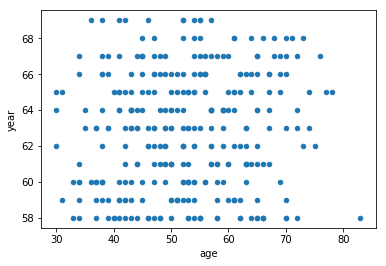

In [11]:
#2d scatter plot

survivaldata.plot(kind='scatter',x='age',y='year')
plt.show()


#### Observations:
We couldn't find out any thing here,as all data points is in same colour

Now lets colour the points based on what class they belong to.

 # 2-D Scatter plot with color-coding
 
 ## 2-D scatter plot with Age and Year

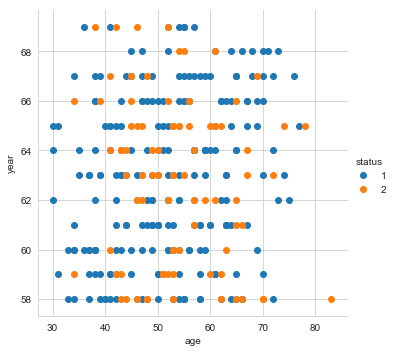

In [12]:
# 2-D Scatter plot with color-coding for each class.
# Here 'sns' corresponds to seaborn. 

sns.set_style("whitegrid");
sns.FacetGrid(survivaldata,hue="status",height=5).map(plt.scatter,"age","year").add_legend();
plt.show();


#### Observations:
Here we couldn't observe anything with Age and Year.There is so much of overlapping.The classes are not linearly separable

 ## 2-D scatter plot with Age and Nodes

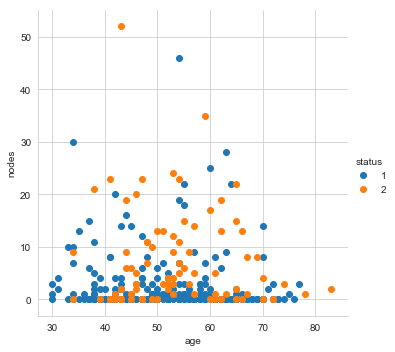

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(survivaldata,hue="status",height=5).map(plt.scatter,"age","nodes").add_legend();
plt.show();

#### Observations:
Here we couldn't observe anything with Age and Nodes.There is so much of overlapping.The classes are not linearly separable

 ## 2-D scatter plot with year and Nodes

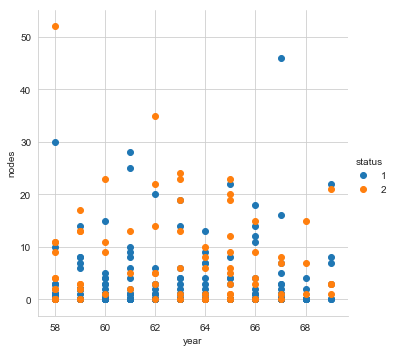

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(survivaldata,hue="status",height=5).map(plt.scatter,"year","nodes").add_legend();
plt.show();

#### Observations:
Here we couldn't observe anything with Year and Nodes.There is so much of overlapping.The classes are not linearly separable

# PairPlots

We use Pair plots, where the number of dimesions are less.
The diaognal elements are the PDF's of each feature.

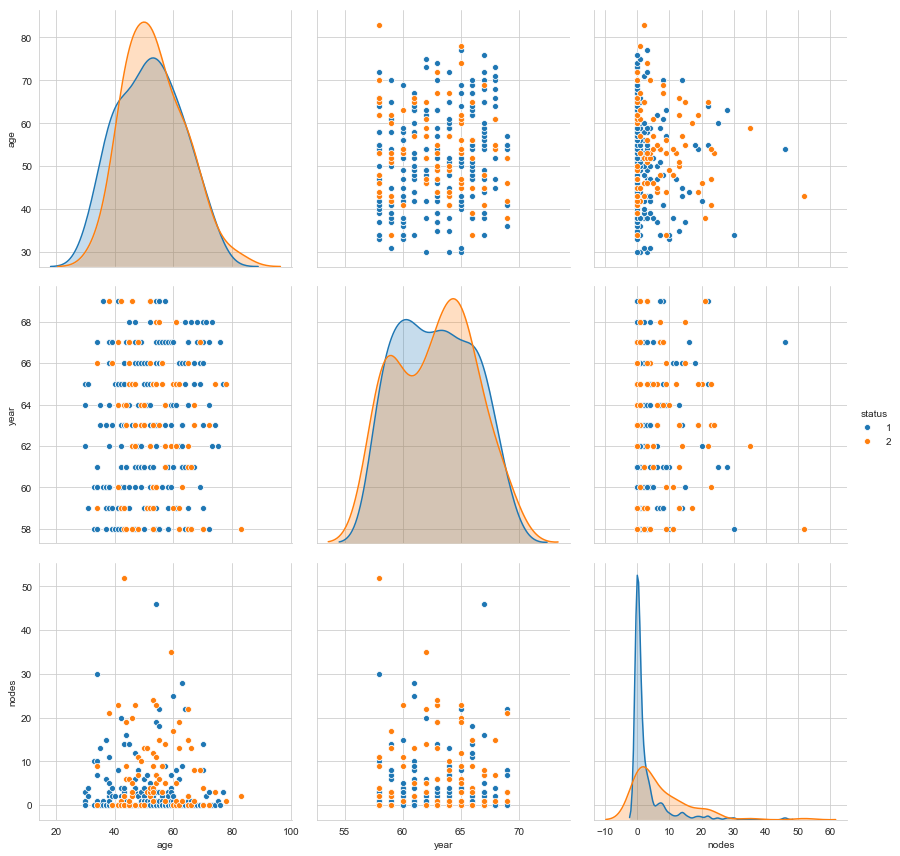

In [95]:
#pairPlots

plt.close();
sns.set_style("whitegrid");
sns.pairplot(survivaldata, hue="status",vars = ["age", "year", "nodes"], height=4);
plt.show();

#### Observations:

From the above plot,
we did not get much info,as there is lot of overlapping.But we can still have little assumptions as follows

1)In the plot between nodes and age,there are so many deaths for the age range between 39 and 50
2)In the plot between nodes and year,there are so many deaths between year 62 and 66

In both the above cases,Number of nodes is playing a major role.because,
There are less number of deaths when no of nodes are less than 5,when compared to nodes more than 5.
So,No of Nodes is the major Feature in the given data set.

we cannot build a model here as the two classes are not well separted in any one of the plots above.


# Univariate Analysis

## 1-D Scatter plot

### 1-D Scatter plot with Age

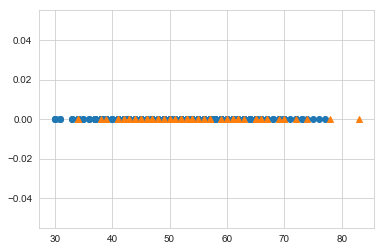

In [56]:
#1-D scatter plot of age

import numpy as np

alive=survivaldata.loc[survivaldata["status"]==1];
expired=survivaldata.loc[survivaldata["status"]==2];

plt.plot(alive["age"],np.zeros_like(alive["age"]),'o')
plt.plot(expired["age"],np.zeros_like(expired["age"]),'^')
plt.show()

### 1-D Scatter plot with Year

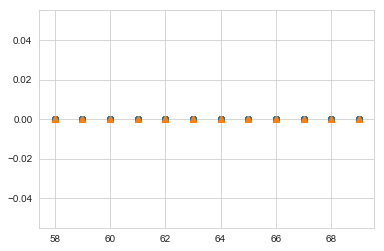

In [55]:
#1-D scatter plot of year

import numpy as np

alive=survivaldata.loc[survivaldata["status"]==1];
expired=survivaldata.loc[survivaldata["status"]==2];

plt.plot(alive["year"],np.zeros_like(alive["year"]),'o')
plt.plot(expired["year"],np.zeros_like(expired["year"]),'^')
plt.show()

### 1-D Scatter plot with Nodes

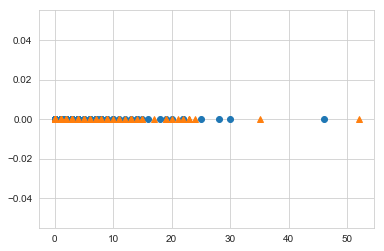

In [54]:
#1-D scatter plot of nodes

import numpy as np

alive=survivaldata.loc[survivaldata["status"]==1];
expired=survivaldata.loc[survivaldata["status"]==2];

plt.plot(alive["nodes"],np.zeros_like(alive["nodes"]),'o')
plt.plot(expired["nodes"],np.zeros_like(expired["nodes"]),'^')
plt.show()

#### Observations:
could not make any sense of these plots,Because there is lot of overlapping.

# PDF(Probability Density Function)

## Histogram & PDF of Age

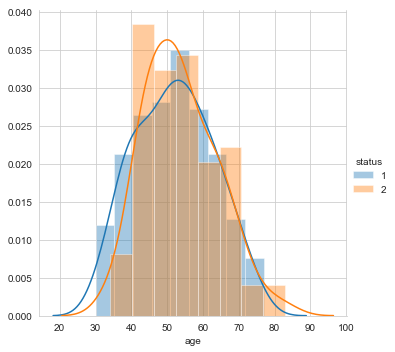

In [44]:
#histogram and pdf

sns.FacetGrid(survivaldata,hue="status",height=5).map(sns.distplot,"age").add_legend();
plt.show();

## Histogram & PDF of Year

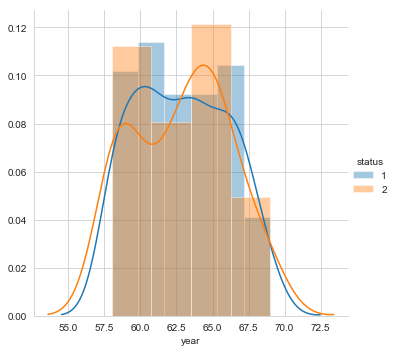

In [29]:
sns.FacetGrid(survivaldata,hue="status",height=5).map(sns.distplot,"year").add_legend();
plt.show();

## Histogram & PDF of Nodes

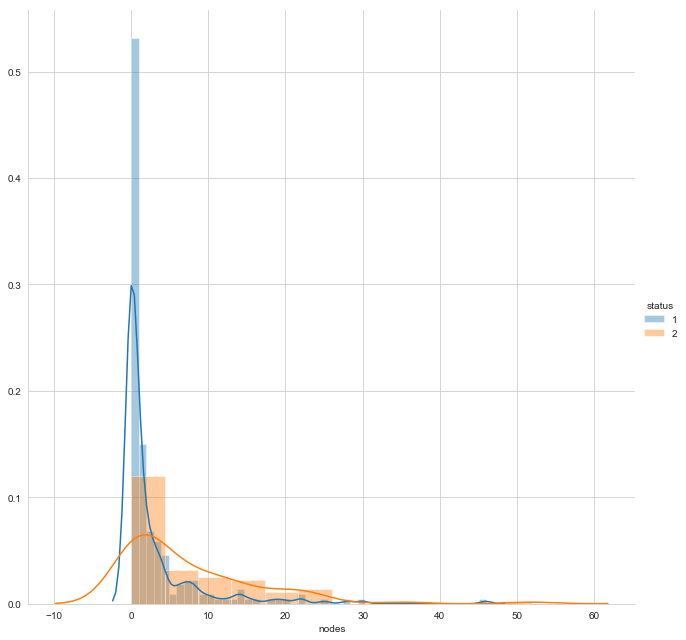

In [97]:
sns.FacetGrid(survivaldata,hue="status",height=9).map(sns.distplot,"nodes").add_legend();
plt.show();

#### Observations:

In the PDF's of Age and year, the classes are overlapping so much,and we couldn't come to any conclusion

The Nodes PDF is definitely giving us a little or more info
The observations are:
1)53% of the patients who survived after surgery has less than 3 Nodes
2)12% of patients who expired after the surgery has more than 3 nodes

# CDF(Cumulative Distributed Function)

We can visually see,what percentage of the two different features have different datapoints

## CDF of Nodes

pdf-Alive:  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
CDF-Alive:  [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
pdf-Expired:  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
CDF-Expired:  [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


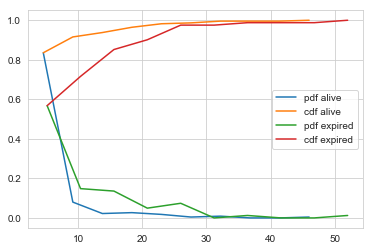

In [118]:
#Plot CDF of nodes

counts,bin_edges=np.histogram(alive["nodes"],bins=10,density=True)
pdf=counts/sum(counts)
print("pdf-Alive: ",pdf)

cdf=np.cumsum(pdf)
print("CDF-Alive: ",cdf)

plt.plot(bin_edges[1:],pdf,label="pdf alive")
plt.plot(bin_edges[1:],cdf,label="cdf alive")

counts,bin_edges=np.histogram(expired["nodes"],bins=10,density=True)
pdf=counts/sum(counts)

print("pdf-Expired: ",pdf)

cdf=np.cumsum(pdf)
print("CDF-Expired: ",cdf)

plt.plot(bin_edges[1:],pdf,label="pdf expired")
plt.plot(bin_edges[1:],cdf,label="cdf expired")
plt.legend();
plt.show();

#### Observations:

1)If the number of auxillary nodes are more than 3,there is less chance of survival for more than 5 years.
Approximately 90% of pateints who survived, has auxillary nodes less than 9

2)If the number of auxillary nodes are more than 3,they might not live for more than 5 years.The chance of survival decreases.
Approximately 55% of patients who expired, has auxillary nodes more than 3.


## CDF of Age

pdf-Alive:  [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
CDF-Alive:  [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
pdf-Expired:  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
CDF-Expired:  [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


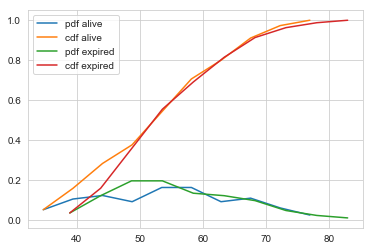

In [119]:
#Plot CDF of age

counts,bin_edges=np.histogram(alive["age"],bins=10,density=True)

pdf=counts/sum(counts)

print("pdf-Alive: ",pdf)

cdf=np.cumsum(pdf)
print("CDF-Alive: ",cdf)

plt.plot(bin_edges[1:],pdf,label="pdf alive")
plt.plot(bin_edges[1:],cdf,label="cdf alive")

counts,bin_edges=np.histogram(expired["age"],bins=10,density=True)
pdf=counts/sum(counts)

print("pdf-Expired: ",pdf)

cdf=np.cumsum(pdf)
print("CDF-Expired: ",cdf)

plt.plot(bin_edges[1:],pdf,label="pdf expired")
plt.plot(bin_edges[1:],cdf,label="cdf expired")
plt.legend();
plt.show();

#### Observations:
1)patients Aged from  53 to 58 years have higher survival rate.and there is chance of survival after the age 68yrs.
Approximately 70% of people wo survived are of age less than 58

2)About 20 % of people who expired are aged between 48 and 54 yrs.
About 80% of people who expired are aged less than 63


## CDF of Year

pdf-Alive:  [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
CDF-Alive:  [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
pdf-Expired:  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
CDF-Expired:  [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


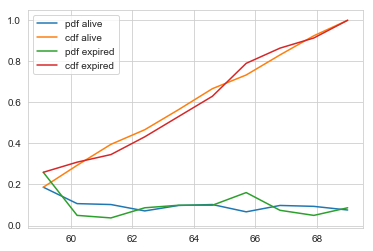

In [120]:
#Plot CDF of year

counts,bin_edges=np.histogram(alive["year"],bins=10,density=True)
pdf=counts/sum(counts)

print("pdf-Alive: ",pdf)

cdf=np.cumsum(pdf)
print("CDF-Alive: ",cdf)

plt.plot(bin_edges[1:],pdf,label="pdf alive")
plt.plot(bin_edges[1:],cdf,label="cdf alive")

counts,bin_edges=np.histogram(expired["year"],bins=10,density=True)
pdf=counts/sum(counts)

print("pdf-Expired: ",pdf)

cdf=np.cumsum(pdf)
print("CDF-Expired: ",cdf)

plt.plot(bin_edges[1:],pdf,label="pdf expired")
plt.plot(bin_edges[1:],cdf,label="cdf expired")
plt.legend();
plt.show();

#### Observations:
1)About 19 % patients expired are born between years 59 and 60
Approximately 60 % who expired are born before year 1964

2)About 25% of patients expired are born around year 1959
Approximately 80% of patiets who expired are born before 1966


# Mean, Variance, Std-deviation

In [121]:
#Mean, Variance, Std-deviation, 

print("MEAN")
print(np.mean(alive["nodes"]))
#MEan with an outlier
print(np.mean(np.append(alive["nodes"],200)))
print(np.mean(expired["nodes"]))
#print(np.mean(iris_versicolor["petal_length"]))

print("std deviation")
print(np.std(alive["nodes"]))
print(np.std(expired["nodes"]))


MEAN
2.7911111111111113
3.663716814159292
7.45679012345679
std deviation
5.857258449412131
9.128776076761632


# Median, Quantiles, Percentiles, IQR.

In [105]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(alive["nodes"]))
#Median with an outlier
print(np.median(np.append(alive["nodes"],200)));
print(np.median(expired["nodes"]))


print("\nQuantiles:")
print(np.percentile(alive["nodes"],np.arange(0, 100, 25)))
print(np.percentile(expired["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(alive["nodes"],90))
print(np.percentile(expired["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(alive["nodes"]))
print(robust.mad(expired["nodes"]))



Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# Box plots

Box plots gives the statistical summary of the given data
The top and bottom Lines of Box gives the 25th and 75th percentiles.
The Middle line passing through the box is called the Inter Quantile Range i.e 50th percentile
The Whiskers below and above the box is Thresholds

## Box plot for Age

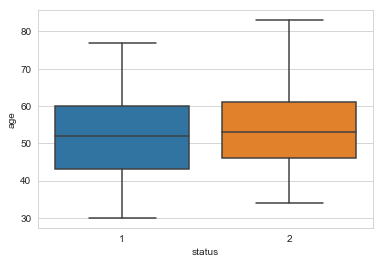

In [111]:
#Box plot for Age

sns.boxplot(x='status',y='age',data=survivaldata)
plt.show();

## Box plot for Year

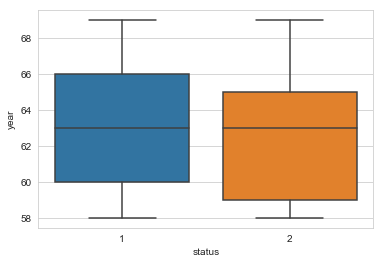

In [110]:
#Box plot for year

sns.boxplot(x='status',y='year',data=survivaldata)
plt.show();

## Box plot for Nodes

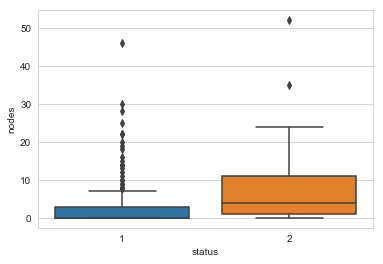

In [109]:
#Box plot for Nodes

sns.boxplot(x='status',y='nodes',data=survivaldata)
plt.show();

#### Observations:
Here In this plot,for status 1, we can observe the 25th and 50th are same ie 0 and 75th percentile is 3.
For status 2, 
25th percentile-1
50th Percentile-4
75th percentile-11

# Violin Plots

Violin plot shows the complete Distribution of data.
It is the combination of Histogram & pdfs and Box plots
Denser regions of the data are fatter, and sparser ones thinner in a violin plot



## Violin Plot for Age

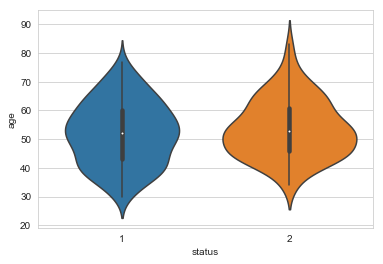

In [113]:
sns.violinplot(x="status", y="age", data=survivaldata, size=8)
plt.show()

## Violin Plot for Year

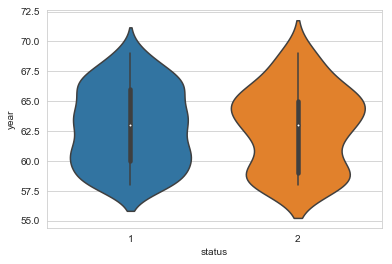

In [114]:
sns.violinplot(x="status", y="year", data=survivaldata, size=8)
plt.show()

## Violin Plot for Nodes

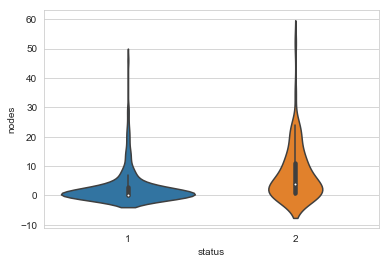

In [115]:
sns.violinplot(x="status", y="nodes", data=survivaldata, size=8)
plt.show()

#### Observations:
In the above plot,the centre box is the box plot which we know.It has 25th,50th and 75th percentiles
The white dot represents the Median

# Conclusion for the Habermanns Cancer Survival Data

1.The Given dataset is Imbalanced Dataset as it does not have the equal number of datapoints for each class.

2.In the UniVariate Analysis like 1D-Scatter plot, Histogram,PDF & CDF, Box Plots and Violin Plots, we can observe that No of Auxillary Nodes is playing a role,which is giving little assumptions.So,The Number of Auxillary Nodes is the well important Feature of given Data set.

3.In the Bivariate Analysis like  2D-scatter plot and Pair Plot,the given dataset is not linearly separable.There is so much of overlapping.The two classes are not well separated in any one of the Bivariate Plots.

4.Well,The Box plots and Violin plots are giving the better info comapared to the PDF and CDF in the form of Percentiles.

4.But the Assumptions what we observed are not well enough to Build a model of classifying the survival status,as the classes are always overlapping.

